25550

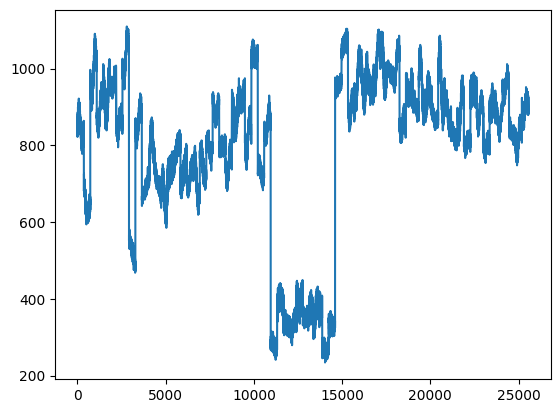

In [159]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import random

df=pd.read_csv("dataset/test.csv")
df.columns
df= df[['number_sold']].copy().dropna()
plt.plot(df)
df.count()
len(df)


POT= 1254


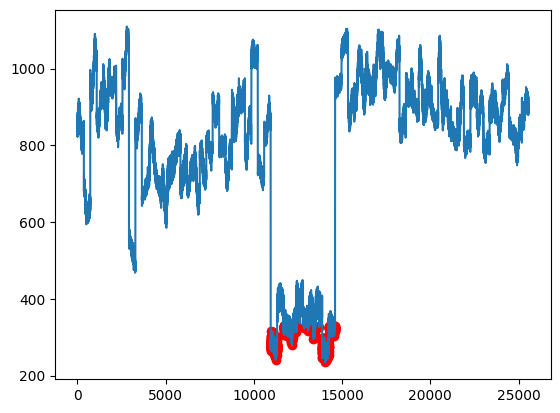

In [233]:

threshold=df['number_sold'].quantile(0.05)
# threshold=12

extremes = df[df['number_sold'] < threshold]
print("POT=", len(extremes))


# #BM
# # Set your block size (e.g., '30D' for 30-day blocks)
# block_size = 300

# # Calculate block groups
# block_groups = (df.index - df.index[0]) // block_size

# # Find maxima indices and filter the DataFrame
# min_indices = df.groupby(block_groups)['number_sold'].idxmin()
# extremes = df.loc[min_indices]
# print("BM= ",len(extremes))

plt.plot (df)
plt.scatter(extremes.index,extremes,color='red')

(array([ 1.,  0.,  1.,  0.,  1.,  2.,  1.,  3.,  6.,  4.,  8.,  6., 17.,
        17., 10., 19.,  7., 26., 37., 27., 32., 22., 38., 29., 55., 51.,
        13., 56., 21., 34., 35., 15., 31., 10., 17., 12., 17., 15., 11.,
        13.,  3., 27., 10.,  8.,  8.,  7., 27.,  7., 29., 31.,  9., 25.,
        13., 33., 38., 28., 62., 28., 67., 74.]),
 array([234.        , 235.58333333, 237.16666667, 238.75      ,
        240.33333333, 241.91666667, 243.5       , 245.08333333,
        246.66666667, 248.25      , 249.83333333, 251.41666667,
        253.        , 254.58333333, 256.16666667, 257.75      ,
        259.33333333, 260.91666667, 262.5       , 264.08333333,
        265.66666667, 267.25      , 268.83333333, 270.41666667,
        272.        , 273.58333333, 275.16666667, 276.75      ,
        278.33333333, 279.91666667, 281.5       , 283.08333333,
        284.66666667, 286.25      , 287.83333333, 289.41666667,
        291.        , 292.58333333, 294.16666667, 295.75      ,
        297.333333

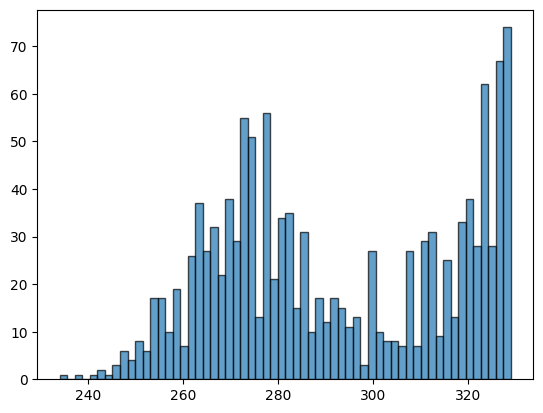

In [234]:
plt.hist(extremes, bins=60, edgecolor='black', alpha=0.7)

60 60


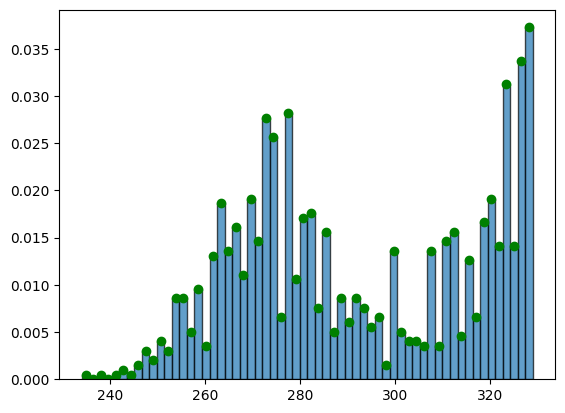

In [235]:
# print (extremes)
y_obser, bin_edges = np.histogram(extremes, bins=60, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
print (len(y_obser),len(bin_centers))
plt.hist(extremes, bins=60,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')



2.6855118091706722 232.01452425774454 68.10711768036327


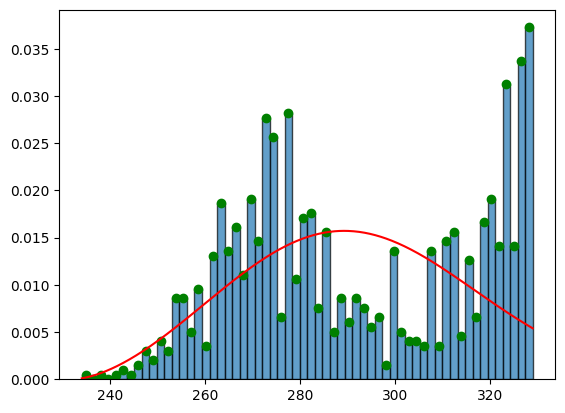

In [236]:
from scipy.stats import weibull_min
c,l,s = weibull_min.fit(extremes)
print(c,l,s)

x_axis= np.linspace(extremes.min(), extremes.max(), 500) 
pdf= weibull_min.pdf(x_axis,c,l,s)
plt.hist(extremes, bins=60,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')
plt.plot(x_axis,pdf,color='red')



1.1262525787712572 253.6694545851111 84.84122103376393


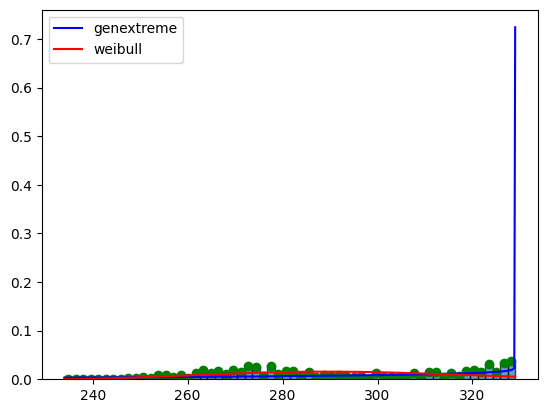

In [237]:
from scipy.stats import genextreme

c2,l2,s2= genextreme.fit(extremes,method='MLE')
print (c2,l2,s2)

pdf2= genextreme.pdf(x_axis,c2,l2,s2)
plt.plot(x_axis,pdf2,color='blue',label='genextreme')
plt.hist(extremes, bins=60,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')
plt.plot(x_axis,pdf,color='red',label='weibull')
plt.legend()

In [238]:
from scipy.stats import kstest
pdf= weibull_min.pdf(bin_centers,c,l,s)

D, p_value = kstest(y_obser,pdf, args=(c,l,s))

print(f"KS Test D-statistic: {D:.4f}")
print(f"p-value: {p_value}")


KS Test D-statistic: 0.2167
p-value: 0.11976314781726739


In [239]:
from sklearn.metrics import r2_score

r2 = r2_score(y_obser, pdf)
print(f"R² score: {r2:.4f}")


R² score: -0.0417


In [240]:
from scipy.stats import kstest
pdf= genextreme.pdf(bin_centers,c2,l2,s2)

D, p_value = kstest(y_obser,pdf, args=(c2,l2,s2))

print(f"KS Test D-statistic: {D:.4f}")
print(f"p-value: {p_value}")


KS Test D-statistic: 0.3000
p-value: 0.008703437675484196


In [ ]:
from scipy.stats import kstest
pdf= weibull_min.pdf(bin_centers,c,l,s)

D, p_value = kstest(y_obser,pdf, args=(c,l,s))

print(f"KS Test D-statistic: {D:.4f}")
print(f"p-value: {p_value}")


KS Test D-statistic: 0.2167
p-value: 0.11976314781726739


In [ ]:
from scipy.stats import kstest
pdf= weibull_min.pdf(bin_centers,c,l,s)

D, p_value = kstest(y_obser,pdf, args=(c,l,s))

print(f"KS Test D-statistic: {D:.4f}")
print(f"p-value: {p_value}")


KS Test D-statistic: 0.2167
p-value: 0.11976314781726739


In [ ]:
from scipy.stats import kstest
pdf= weibull_min.pdf(bin_centers,c,l,s)

D, p_value = kstest(y_obser,pdf, args=(c,l,s))

print(f"KS Test D-statistic: {D:.4f}")
print(f"p-value: {p_value}")


KS Test D-statistic: 0.2167
p-value: 0.11976314781726739


In [ ]:
from scipy.stats import kstest
pdf= weibull_min.pdf(bin_centers,c,l,s)

D, p_value = kstest(y_obser,pdf, args=(c,l,s))

print(f"KS Test D-statistic: {D:.4f}")
print(f"p-value: {p_value}")


KS Test D-statistic: 0.2167
p-value: 0.11976314781726739


#RETURN LEVELS

In [282]:
return_periods = [1.5, 2, 5, 10, 25, 50,100]

# Calculate return levels
return_values = [genextreme.ppf(1 - 1/T,c2,l2,s2) for T in return_periods]

# Display results
for T, val in zip(return_periods, return_values):
    print(f"Return period = {T} → Return value ≈ {val:.4f}")

Return period = 1.5 → Return value ≈ 245.2524
Return period = 2 → Return value ≈ 279.1460
Return period = 5 → Return value ≈ 315.0905
Return period = 10 → Return value ≈ 323.0261
Return period = 25 → Return value ≈ 326.9465
Return period = 50 → Return value ≈ 328.0701
Return period = 100 → Return value ≈ 328.5764


c:\Program Files (x86)\Python\python3.8\lib\site-packages\pyextremes\eva.py:111: RuntimeWarning: 25,185 duplicate indices found in `data` - removing duplicate entries
  warnings.warn(message=message, category=RuntimeWarning)


25


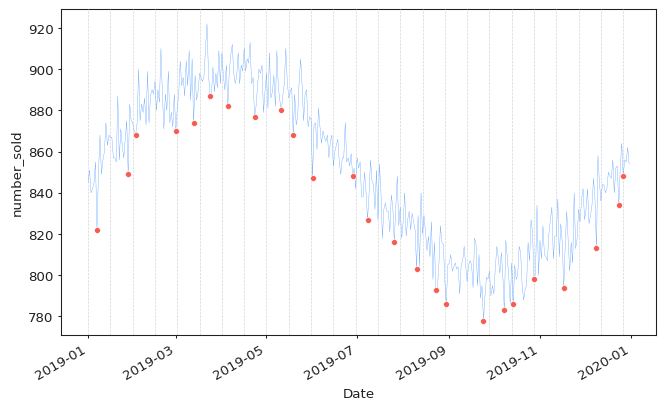

In [278]:
import pyextremes as px
df=pd.read_csv("dataset/test.csv")
df.columns
df=df[['Date','number_sold']]
df.head()
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


model=px.EVA(df['number_sold'])

model.get_extremes(method="BM",extremes_type='low',block_size='15D')
model.plot_extremes()
print(model.extremes.count())


(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='number_sold'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='number_sold', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

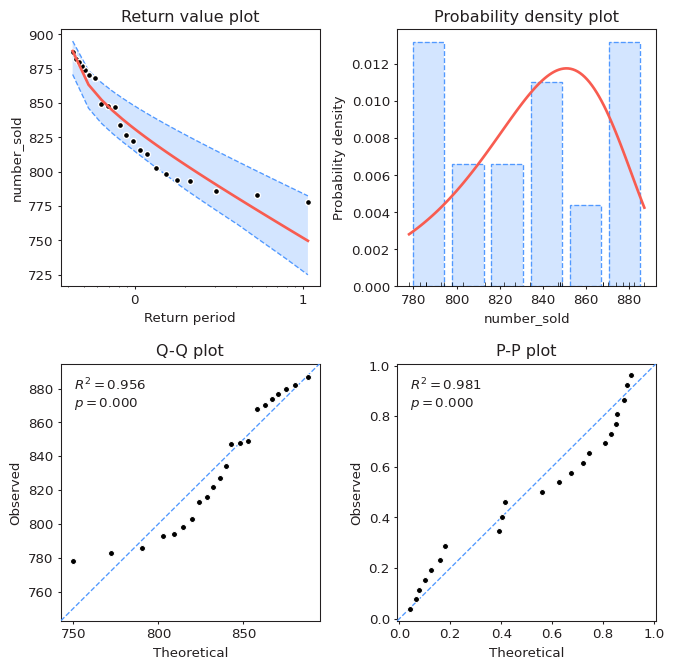

In [279]:
model.fit_model(model="MLE")
model.plot_diagnostic(alpha=0.95)